In [5]:
import platform
print(platform.python_build())
print(platform.python_implementation())

('main', 'Feb 16 2024 20:50:58')
CPython


In [79]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
instagramveri=pd.read_csv('/content/drive/My Drive/CSS2 - Group 2 Folder/final-v1.csv')

In [ ]:
instagramveri.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [ ]:
instagramveri.tail()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
780,0.0,0.020,9,0,0,14,1,0,0,0,0,0,0
781,0.0,0.081,18,1,0,15,1,0,0,0,0,0,0
782,0.0,0.115,9,0,0,8,1,0,0,0,0,0,0
783,0.0,0.049,12,0,0,28,1,0,0,0,0,0,0
784,0.0,0.096,11,0,0,0,1,0,0,0,0,0,0


In [ ]:
instagramveri.shape

(785, 13)

In [ ]:
instagramveri.columns

Index(['edge_followed_by', 'edge_follow', 'username_length',
       'username_has_number', 'full_name_has_number', 'full_name_length',
       'is_private', 'is_joined_recently', 'has_channel',
       'is_business_account', 'has_guides', 'has_external_url', 'is_fake'],
      dtype='object')

In [ ]:
#instagramveri.rename(columns={'edge_followed_by':'TakipEdilenTaraf',
#                              'edge_follow':'Takip',
#                             'username_length':'KullanıcıAdı_Uzunluğu',
#                              'username_has_number':'KullanıcıNumarası',
#                              'full_name_has_number':'TamAdıNumara',
#                              'full_name_length':'TamAdıUzunluğu',
#                              'is_private':'Özel Mi?',
#                              'is_joined_recently':'YakınZamandaKatıldı',
#                              'has_channel':'Kanal',
#                              'is_business_account':'İşletmeHesabı',
#                              'has_guides':'Rehberler',
#                              'has_external_url':'Url',
 #                             'is_fake':'Sahtemi_Gerçekmi'}, inplace=True)

In [ ]:
instagramveri.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [ ]:
instagramveri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [ ]:
instagramveri.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [ ]:
instagramveri.describe().T

,count,mean,std,min,25%,50%,75%,max
edge_followed_by,785.0,0.002223,0.036105,0.0,0.000,0.000,0.000,1.0
edge_follow,785.0,0.401606,0.293845,0.0,0.135,0.336,0.623,1.0
username_length,785.0,11.630573,3.284329,5.0,9.000,11.000,13.000,26.0
username_has_number,785.0,0.644586,0.478944,0.0,0.000,1.000,1.000,1.0
full_name_has_number,785.0,0.109554,0.312532,0.0,0.000,0.000,0.000,1.0
full_name_length,785.0,6.129936,6.943903,0.0,0.000,5.000,11.000,30.0
is_private,785.0,0.184713,0.388312,0.0,0.000,0.000,0.000,1.0
is_joined_recently,785.0,0.361783,0.480823,0.0,0.000,0.000,1.000,1.0
has_channel,785.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0
is_business_account,785.0,0.073885,0.261751,0.0,0.000,0.000,0.000,1.0


In [ ]:
instagramveri=instagramveri.drop(['has_channel'], axis=1)

In [ ]:
corr=instagramveri.corr()
corr

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,0.036585,0.002749,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,-0.132422,0.002723,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,0.132683,-0.006861,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,-0.278637,-0.048097,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,-0.083482,-0.012527,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,0.323137,0.122848,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,-0.134444,-0.016999,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,-0.172122,-0.026889,-0.150433,0.276012
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,1.000000,0.126443,0.289467,-0.318395
has_guides,0.002749,0.002723,-0.006861,-0.048097,-0.012527,0.122848,-0.016999,-0.026889,0.126443,1.000000,0.138415,-0.097421


<Axes: >

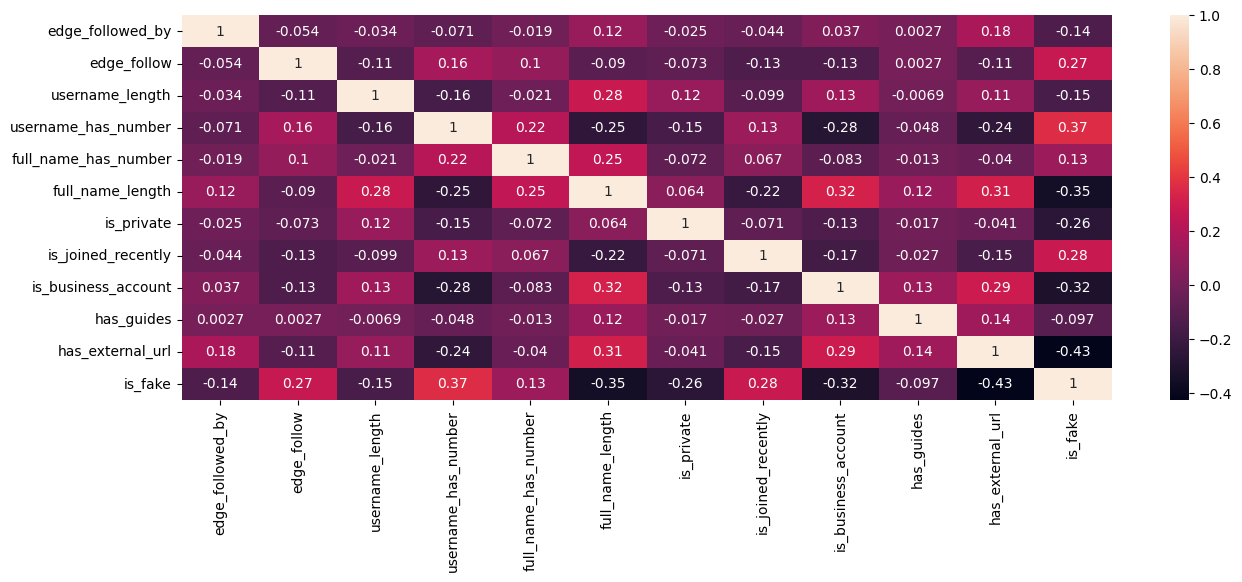

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

In [ ]:
instagramveri['is_fake'].value_counts()

is_fake
1    692
0     93
Name: count, dtype: int64

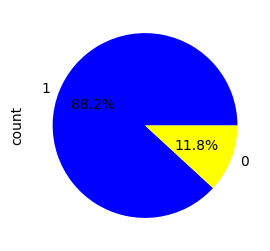

In [ ]:
plt.figure(figsize=(3,3))
colors=['blue','yellow']
instagramveri.is_fake.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

<Axes: xlabel='is_fake', ylabel='count'>

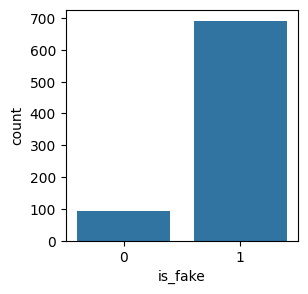

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='is_fake', data=instagramveri)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=instagramveri.drop(['is_fake'], axis=1)
y=instagramveri['is_fake']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.15 , random_state=41)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve

In [ ]:
classifier=DecisionTreeClassifier()

In [ ]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[ 13   3]
 [  1 101]]


<Axes: >

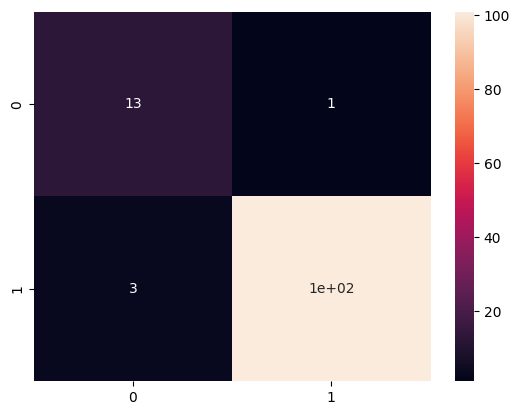

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9661016949152542


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.99      0.97      0.98       104

    accuracy                           0.97       118
   macro avg       0.90      0.95      0.92       118
weighted avg       0.97      0.97      0.97       118



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(random_state=0)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[ 13   1]
 [  1 103]]


In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9830508474576272


<Axes: >

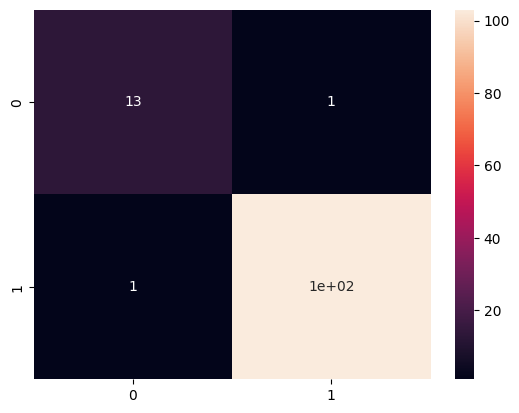

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.99      0.99      0.99       104

    accuracy                           0.98       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.98      0.98      0.98       118



# Logistic Regression

##Import necessary libraries

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Create an instance of the logistic regression model
logreg = LogisticRegression()

In [ ]:
# Fit the model to the training data
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred_logreg = logreg.predict(x_test)

In [ ]:
# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(cm_logreg)

[[ 12   2]
 [  3 101]]


In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)

Accuracy: 0.9576271186440678


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.98      0.97      0.98       104

    accuracy                           0.96       118
   macro avg       0.89      0.91      0.90       118
weighted avg       0.96      0.96      0.96       118



#SVM Model

In [ ]:
from sklearn.svm import SVC

# Create an instance of the SVM model
svm_classifier = SVC()



In [ ]:
# Fit the model to the training data
svm_classifier.fit(x_train, y_train)

SVC()

In [ ]:
# Make predictions on the test data
y_pred_svm = svm_classifier.predict(x_test)

In [ ]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[  0  14]
 [  0 104]]


In [ ]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8813559322033898


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.88      1.00      0.94       104

    accuracy                           0.88       118
   macro avg       0.44      0.50      0.47       118
weighted avg       0.78      0.88      0.83       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN using TesnorFlow and Keras

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
19/19 [==============================] - 2s 23ms/step - loss: 0.6688 - accuracy: 0.6017 - val_loss: 0.4771 - val_accuracy: 0.8955
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8883 - val_loss: 0.3198 - val_accuracy: 0.8955
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.3024 - accuracy: 0.8967 - val_loss: 0.2461 - val_accuracy: 0.9104
Epoch 4/10
19/19 [==============================] - 0s 17ms/step - loss: 0.2408 - accuracy: 0.9067 - val_loss: 0.2115 - val_accuracy: 0.9254
Epoch 5/10
19/19 [==============================] - 0s 11ms/step - loss: 0.2049 - accuracy: 0.9250 - val_loss: 0.1967 - val_accuracy: 0.8955
Epoch 6/10
19/19 [==============================] - 0s 14ms/step - loss: 0.1819 - accuracy: 0.9333 - val_loss: 0.1911 - val_accuracy: 0.8806
Epoch 7/10
19/19 [==============================] - 0s 20ms/step - loss: 0.1684 - accuracy: 0.9417 - val_loss: 0.1889 - val_accuracy: 0.8657
Epoch 8/10
19/1

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.940677966101695


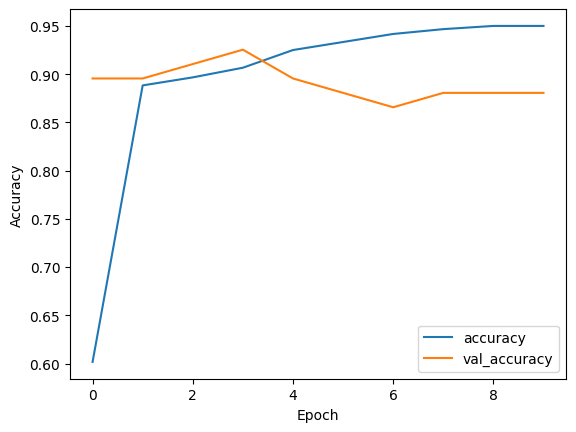

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Genetic Algorithm (GA) Loop for Feature Selection

In [72]:
num_features = len(x_train.columns)

In [73]:
import random

def generate_random_feature_subset(num_features):
    """
    Generates a random feature subset.

    Args:
    - num_features (int): The total number of features in the dataset.

    Returns:
    - list: A list representing the random feature subset. Each element in the list
            corresponds to a feature index, where 1 indicates the feature is selected
            and 0 indicates the feature is not selected.
    """
    # Define the size of the feature subset (e.g., 50% of the total number of features)
    subset_size = int(0.5 * num_features)

    # Generate a random subset of features
    feature_subset = [random.choice([0, 1]) for _ in range(num_features)]

    return feature_subset


In [76]:
def evaluate_fitness(population, model, x_train, y_train, x_test, y_test):
    fitness_scores = []
    for subset in population:
        # Select features based on the subset
        selected_features = [col for col, include in zip(x_train.columns, subset) if include]
        x_train_subset = x_train[selected_features]
        x_test_subset = x_test[selected_features]

        # Train the model
        model.fit(x_train_subset, y_train)

        # Evaluate the model on the test set
        accuracy = model.score(x_test_subset, y_test)

        # Calculate fitness score (in this case, accuracy)
        fitness_scores.append(accuracy)

    return fitness_scores

In [77]:
# Define the Genetic Algorithm parameters
population_size = 50
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

# Initialize the population with random feature subsets
population = [generate_random_feature_subset(num_features) for _ in range(population_size)]

# Genetic Algorithm loop
for generation in range(num_generations):
    # Evaluate the fitness of each feature subset in the population
    fitness_scores = [evaluate_fitness(feature_subset) for feature_subset in population]

    # Select individuals for reproduction (using tournament selection, roulette wheel, or other methods)
    selected_indices = select_individuals(fitness_scores)
    selected_population = [population[i] for i in selected_indices]

    # Create offspring through crossover
    offspring_population = []
    while len(offspring_population) < population_size:
        parent1, parent2 = select_parents(selected_population)
        child1, child2 = crossover(parent1, parent2, crossover_rate)
        offspring_population.append(child1)
        offspring_population.append(child2)

    # Apply mutation to the offspring population
    mutated_offspring_population = [mutate(individual, mutation_rate) for individual in offspring_population]

    # Replace the current population with the new generation
    population = mutated_offspring_population

    # Termination criteria (e.g., maximum number of generations, convergence)
    if termination_criteria_met():
        break

# Select the best individual (feature subset) from the final population
best_individual = select_best_individual(population)

# Train the final model using the selected features
final_features = decode_feature_subset(best_individual)
final_model = train_final_model(final_features, x_train, y_train)

# Evaluate the final model on the test set
test_accuracy = evaluate_final_model(final_model, x_test, y_test)
print("Final model accuracy:", test_accuracy)


TypeError: evaluate_fitness() missing 5 required positional arguments: 'model', 'x_train', 'y_train', 'x_test', and 'y_test'